In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
data = pd.read_csv("final_without_weather.csv")
data.drop(['Month'], axis =1, inplace= True)
data.set_index("pickuptime", inplace= True)
num_pickups = data.total
num_green_pickups = data.green
num_yellow_pickups = data.yellow
data.drop(['green', 'yellow', 'total'], axis =1, inplace = True)

In [4]:
def series_to_supervised(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    
    if dropnan:
        agg.dropna(inplace = True)
        
    return agg

In [5]:
features_and_target = pd.concat([data, num_pickups], axis = 1)
values = features_and_target.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(values)

n_hours = 47

reframed = series_to_supervised(scaled, n_hours, 1)

n_features = features_and_target.shape[1]


In [7]:
# delete significantly wrong data & compare the date value
total_values = reframed.values
n_p = np.argmin(total_values[365*24*3:, -1])
n_p = n_p + 365*24*3

a = total_values[: n_p, :]
b = total_values[n_p + n_hours + 1 : , :]
total_values = np.concatenate((a, b), axis=0)

# result variable
result = np.zeros((5, 24))

Train on 1095 samples, validate on 269 samples
Epoch 1/200
 - 1s - loss: 0.3172 - val_loss: 0.1701
Epoch 2/200
 - 0s - loss: 0.2695 - val_loss: 0.1263
Epoch 3/200
 - 0s - loss: 0.2222 - val_loss: 0.0869
Epoch 4/200
 - 0s - loss: 0.1750 - val_loss: 0.0565
Epoch 5/200
 - 0s - loss: 0.1312 - val_loss: 0.0478
Epoch 6/200
 - 0s - loss: 0.0981 - val_loss: 0.0680
Epoch 7/200
 - 0s - loss: 0.0852 - val_loss: 0.1042
Epoch 8/200
 - 0s - loss: 0.0891 - val_loss: 0.1356
Epoch 9/200
 - 0s - loss: 0.1001 - val_loss: 0.1557
Epoch 10/200
 - 0s - loss: 0.1099 - val_loss: 0.1658
Epoch 11/200
 - 0s - loss: 0.1153 - val_loss: 0.1668
Epoch 12/200
 - 0s - loss: 0.1160 - val_loss: 0.1608
Epoch 13/200
 - 0s - loss: 0.1126 - val_loss: 0.1497
Epoch 14/200
 - 0s - loss: 0.1066 - val_loss: 0.1348
Epoch 15/200
 - 0s - loss: 0.0986 - val_loss: 0.1175
Epoch 16/200
 - 0s - loss: 0.0898 - val_loss: 0.0986
Epoch 17/200
 - 0s - loss: 0.0813 - val_loss: 0.0792
Epoch 18/200
 - 0s - loss: 0.0745 - val_loss: 0.0613
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0487 - val_loss: 0.0207
Epoch 155/200
 - 0s - loss: 0.0487 - val_loss: 0.0207
Epoch 156/200
 - 0s - loss: 0.0486 - val_loss: 0.0208
Epoch 157/200
 - 0s - loss: 0.0485 - val_loss: 0.0208
Epoch 158/200
 - 0s - loss: 0.0485 - val_loss: 0.0209
Epoch 159/200
 - 0s - loss: 0.0484 - val_loss: 0.0210
Epoch 160/200
 - 0s - loss: 0.0483 - val_loss: 0.0211
Epoch 161/200
 - 0s - loss: 0.0482 - val_loss: 0.0213
Epoch 162/200
 - 0s - loss: 0.0482 - val_loss: 0.0214
Epoch 163/200
 - 0s - loss: 0.0481 - val_loss: 0.0215
Epoch 164/200
 - 0s - loss: 0.0480 - val_loss: 0.0216
Epoch 165/200
 - 0s - loss: 0.0479 - val_loss: 0.0217
Epoch 166/200
 - 0s - loss: 0.0478 - val_loss: 0.0217
Epoch 167/200
 - 0s - loss: 0.0477 - val_loss: 0.0218
Epoch 168/200
 - 0s - loss: 0.0476 - val_loss: 0.0218
Epoch 169/200
 - 0s - loss: 0.0475 - val_loss: 0.0219
Epoch 170/200
 - 0s - loss: 0.0474 - val_loss: 0.0219
Epoch 171/200
 - 0s - loss: 0.0473 - val_loss: 0.0221
Epoch 172/200
 - 0s - loss: 

Epoch 107/200
 - 0s - loss: 0.0616 - val_loss: 0.0415
Epoch 108/200
 - 0s - loss: 0.0616 - val_loss: 0.0413
Epoch 109/200
 - 0s - loss: 0.0615 - val_loss: 0.0411
Epoch 110/200
 - 0s - loss: 0.0614 - val_loss: 0.0408
Epoch 111/200
 - 0s - loss: 0.0614 - val_loss: 0.0405
Epoch 112/200
 - 0s - loss: 0.0613 - val_loss: 0.0403
Epoch 113/200
 - 0s - loss: 0.0613 - val_loss: 0.0402
Epoch 114/200
 - 0s - loss: 0.0612 - val_loss: 0.0399
Epoch 115/200
 - 0s - loss: 0.0611 - val_loss: 0.0396
Epoch 116/200
 - 0s - loss: 0.0611 - val_loss: 0.0392
Epoch 117/200
 - 0s - loss: 0.0610 - val_loss: 0.0388
Epoch 118/200
 - 0s - loss: 0.0610 - val_loss: 0.0384
Epoch 119/200
 - 0s - loss: 0.0609 - val_loss: 0.0381
Epoch 120/200
 - 0s - loss: 0.0609 - val_loss: 0.0380
Epoch 121/200
 - 0s - loss: 0.0608 - val_loss: 0.0379
Epoch 122/200
 - 0s - loss: 0.0608 - val_loss: 0.0379
Epoch 123/200
 - 0s - loss: 0.0607 - val_loss: 0.0378
Epoch 124/200
 - 0s - loss: 0.0607 - val_loss: 0.0376
Epoch 125/200
 - 0s - loss: 

 - 0s - loss: 0.0942 - val_loss: 0.0559
Epoch 60/200
 - 0s - loss: 0.0942 - val_loss: 0.0553
Epoch 61/200
 - 0s - loss: 0.0940 - val_loss: 0.0542
Epoch 62/200
 - 0s - loss: 0.0939 - val_loss: 0.0528
Epoch 63/200
 - 0s - loss: 0.0938 - val_loss: 0.0513
Epoch 64/200
 - 0s - loss: 0.0937 - val_loss: 0.0497
Epoch 65/200
 - 0s - loss: 0.0936 - val_loss: 0.0483
Epoch 66/200
 - 0s - loss: 0.0935 - val_loss: 0.0472
Epoch 67/200
 - 0s - loss: 0.0935 - val_loss: 0.0464
Epoch 68/200
 - 0s - loss: 0.0935 - val_loss: 0.0460
Epoch 69/200
 - 0s - loss: 0.0934 - val_loss: 0.0459
Epoch 70/200
 - 0s - loss: 0.0934 - val_loss: 0.0460
Epoch 71/200
 - 0s - loss: 0.0933 - val_loss: 0.0465
Epoch 72/200
 - 0s - loss: 0.0932 - val_loss: 0.0471
Epoch 73/200
 - 0s - loss: 0.0932 - val_loss: 0.0478
Epoch 74/200
 - 0s - loss: 0.0931 - val_loss: 0.0486
Epoch 75/200
 - 0s - loss: 0.0930 - val_loss: 0.0494
Epoch 76/200
 - 0s - loss: 0.0929 - val_loss: 0.0501
Epoch 77/200
 - 0s - loss: 0.0929 - val_loss: 0.0506
Epoch 

 - 0s - loss: 0.1324 - val_loss: 0.0688
Epoch 12/200
 - 0s - loss: 0.1257 - val_loss: 0.0555
Epoch 13/200
 - 0s - loss: 0.1207 - val_loss: 0.0468
Epoch 14/200
 - 0s - loss: 0.1177 - val_loss: 0.0433
Epoch 15/200
 - 0s - loss: 0.1167 - val_loss: 0.0421
Epoch 16/200
 - 0s - loss: 0.1170 - val_loss: 0.0429
Epoch 17/200
 - 0s - loss: 0.1183 - val_loss: 0.0447
Epoch 18/200
 - 0s - loss: 0.1197 - val_loss: 0.0460
Epoch 19/200
 - 0s - loss: 0.1207 - val_loss: 0.0463
Epoch 20/200
 - 0s - loss: 0.1207 - val_loss: 0.0454
Epoch 21/200
 - 0s - loss: 0.1200 - val_loss: 0.0439
Epoch 22/200
 - 0s - loss: 0.1186 - val_loss: 0.0423
Epoch 23/200
 - 0s - loss: 0.1171 - val_loss: 0.0414
Epoch 24/200
 - 0s - loss: 0.1156 - val_loss: 0.0416
Epoch 25/200
 - 0s - loss: 0.1146 - val_loss: 0.0424
Epoch 26/200
 - 0s - loss: 0.1140 - val_loss: 0.0438
Epoch 27/200
 - 0s - loss: 0.1137 - val_loss: 0.0458
Epoch 28/200
 - 0s - loss: 0.1137 - val_loss: 0.0481
Epoch 29/200
 - 0s - loss: 0.1140 - val_loss: 0.0501
Epoch 

Epoch 165/200
 - 0s - loss: 0.0324 - val_loss: 0.0404
Epoch 166/200
 - 0s - loss: 0.0318 - val_loss: 0.0408
Epoch 167/200
 - 0s - loss: 0.0326 - val_loss: 0.0393
Epoch 168/200
 - 0s - loss: 0.0310 - val_loss: 0.0389
Epoch 169/200
 - 0s - loss: 0.0313 - val_loss: 0.0393
Epoch 170/200
 - 0s - loss: 0.0313 - val_loss: 0.0384
Epoch 171/200
 - 0s - loss: 0.0303 - val_loss: 0.0384
Epoch 172/200
 - 0s - loss: 0.0308 - val_loss: 0.0379
Epoch 173/200
 - 0s - loss: 0.0299 - val_loss: 0.0385
Epoch 174/200
 - 0s - loss: 0.0305 - val_loss: 0.0374
Epoch 175/200
 - 0s - loss: 0.0299 - val_loss: 0.0372
Epoch 176/200
 - 0s - loss: 0.0296 - val_loss: 0.0376
Epoch 177/200
 - 0s - loss: 0.0299 - val_loss: 0.0367
Epoch 178/200
 - 0s - loss: 0.0292 - val_loss: 0.0364
Epoch 179/200
 - 0s - loss: 0.0294 - val_loss: 0.0365
Epoch 180/200
 - 0s - loss: 0.0291 - val_loss: 0.0361
Epoch 181/200
 - 0s - loss: 0.0288 - val_loss: 0.0358
Epoch 182/200
 - 0s - loss: 0.0289 - val_loss: 0.0356
Epoch 183/200
 - 0s - loss: 

Epoch 118/200
 - 0s - loss: 0.0487 - val_loss: 0.0672
Epoch 119/200
 - 0s - loss: 0.0481 - val_loss: 0.0645
Epoch 120/200
 - 0s - loss: 0.0473 - val_loss: 0.0631
Epoch 121/200
 - 0s - loss: 0.0464 - val_loss: 0.0632
Epoch 122/200
 - 0s - loss: 0.0455 - val_loss: 0.0623
Epoch 123/200
 - 0s - loss: 0.0446 - val_loss: 0.0619
Epoch 124/200
 - 0s - loss: 0.0437 - val_loss: 0.0630
Epoch 125/200
 - 0s - loss: 0.0430 - val_loss: 0.0639
Epoch 126/200
 - 0s - loss: 0.0426 - val_loss: 0.0634
Epoch 127/200
 - 0s - loss: 0.0423 - val_loss: 0.0627
Epoch 128/200
 - 0s - loss: 0.0420 - val_loss: 0.0616
Epoch 129/200
 - 0s - loss: 0.0416 - val_loss: 0.0586
Epoch 130/200
 - 0s - loss: 0.0410 - val_loss: 0.0545
Epoch 131/200
 - 0s - loss: 0.0405 - val_loss: 0.0533
Epoch 132/200
 - 0s - loss: 0.0403 - val_loss: 0.0501
Epoch 133/200
 - 0s - loss: 0.0401 - val_loss: 0.0487
Epoch 134/200
 - 0s - loss: 0.0399 - val_loss: 0.0469
Epoch 135/200
 - 0s - loss: 0.0396 - val_loss: 0.0474
Epoch 136/200
 - 0s - loss: 

Epoch 71/200
 - 0s - loss: 0.1258 - val_loss: 0.0489
Epoch 72/200
 - 0s - loss: 0.1250 - val_loss: 0.0495
Epoch 73/200
 - 0s - loss: 0.1241 - val_loss: 0.0502
Epoch 74/200
 - 0s - loss: 0.1232 - val_loss: 0.0510
Epoch 75/200
 - 0s - loss: 0.1223 - val_loss: 0.0517
Epoch 76/200
 - 0s - loss: 0.1214 - val_loss: 0.0522
Epoch 77/200
 - 0s - loss: 0.1204 - val_loss: 0.0525
Epoch 78/200
 - 0s - loss: 0.1193 - val_loss: 0.0526
Epoch 79/200
 - 0s - loss: 0.1182 - val_loss: 0.0526
Epoch 80/200
 - 0s - loss: 0.1170 - val_loss: 0.0527
Epoch 81/200
 - 0s - loss: 0.1158 - val_loss: 0.0532
Epoch 82/200
 - 0s - loss: 0.1145 - val_loss: 0.0541
Epoch 83/200
 - 0s - loss: 0.1131 - val_loss: 0.0553
Epoch 84/200
 - 0s - loss: 0.1116 - val_loss: 0.0566
Epoch 85/200
 - 0s - loss: 0.1100 - val_loss: 0.0581
Epoch 86/200
 - 0s - loss: 0.1083 - val_loss: 0.0597
Epoch 87/200
 - 0s - loss: 0.1065 - val_loss: 0.0614
Epoch 88/200
 - 0s - loss: 0.1045 - val_loss: 0.0635
Epoch 89/200
 - 0s - loss: 0.1025 - val_loss: 

Epoch 23/200
 - 0s - loss: 0.1507 - val_loss: 0.0712
Epoch 24/200
 - 0s - loss: 0.1500 - val_loss: 0.0736
Epoch 25/200
 - 0s - loss: 0.1498 - val_loss: 0.0755
Epoch 26/200
 - 0s - loss: 0.1495 - val_loss: 0.0767
Epoch 27/200
 - 0s - loss: 0.1491 - val_loss: 0.0770
Epoch 28/200
 - 0s - loss: 0.1486 - val_loss: 0.0764
Epoch 29/200
 - 0s - loss: 0.1478 - val_loss: 0.0750
Epoch 30/200
 - 0s - loss: 0.1468 - val_loss: 0.0729
Epoch 31/200
 - 0s - loss: 0.1456 - val_loss: 0.0702
Epoch 32/200
 - 0s - loss: 0.1443 - val_loss: 0.0671
Epoch 33/200
 - 0s - loss: 0.1428 - val_loss: 0.0639
Epoch 34/200
 - 0s - loss: 0.1413 - val_loss: 0.0606
Epoch 35/200
 - 0s - loss: 0.1399 - val_loss: 0.0578
Epoch 36/200
 - 0s - loss: 0.1385 - val_loss: 0.0554
Epoch 37/200
 - 0s - loss: 0.1373 - val_loss: 0.0533
Epoch 38/200
 - 0s - loss: 0.1363 - val_loss: 0.0515
Epoch 39/200
 - 0s - loss: 0.1353 - val_loss: 0.0501
Epoch 40/200
 - 0s - loss: 0.1345 - val_loss: 0.0493
Epoch 41/200
 - 0s - loss: 0.1338 - val_loss: 

 - 0s - loss: 0.0408 - val_loss: 0.0602
Epoch 177/200
 - 0s - loss: 0.0406 - val_loss: 0.0593
Epoch 178/200
 - 0s - loss: 0.0404 - val_loss: 0.0601
Epoch 179/200
 - 0s - loss: 0.0402 - val_loss: 0.0604
Epoch 180/200
 - 0s - loss: 0.0400 - val_loss: 0.0601
Epoch 181/200
 - 0s - loss: 0.0398 - val_loss: 0.0596
Epoch 182/200
 - 0s - loss: 0.0396 - val_loss: 0.0596
Epoch 183/200
 - 0s - loss: 0.0394 - val_loss: 0.0595
Epoch 184/200
 - 0s - loss: 0.0391 - val_loss: 0.0590
Epoch 185/200
 - 0s - loss: 0.0389 - val_loss: 0.0587
Epoch 186/200
 - 0s - loss: 0.0387 - val_loss: 0.0591
Epoch 187/200
 - 0s - loss: 0.0384 - val_loss: 0.0589
Epoch 188/200
 - 0s - loss: 0.0382 - val_loss: 0.0584
Epoch 189/200
 - 0s - loss: 0.0379 - val_loss: 0.0580
Epoch 190/200
 - 0s - loss: 0.0377 - val_loss: 0.0574
Epoch 191/200
 - 0s - loss: 0.0374 - val_loss: 0.0571
Epoch 192/200
 - 0s - loss: 0.0371 - val_loss: 0.0570
Epoch 193/200
 - 0s - loss: 0.0369 - val_loss: 0.0570
Epoch 194/200
 - 0s - loss: 0.0366 - val_l

 - 0s - loss: 0.0601 - val_loss: 0.0540
Epoch 130/200
 - 0s - loss: 0.0599 - val_loss: 0.0535
Epoch 131/200
 - 0s - loss: 0.0596 - val_loss: 0.0536
Epoch 132/200
 - 0s - loss: 0.0594 - val_loss: 0.0545
Epoch 133/200
 - 0s - loss: 0.0591 - val_loss: 0.0548
Epoch 134/200
 - 0s - loss: 0.0589 - val_loss: 0.0541
Epoch 135/200
 - 0s - loss: 0.0586 - val_loss: 0.0532
Epoch 136/200
 - 0s - loss: 0.0584 - val_loss: 0.0535
Epoch 137/200
 - 0s - loss: 0.0582 - val_loss: 0.0550
Epoch 138/200
 - 0s - loss: 0.0580 - val_loss: 0.0557
Epoch 139/200
 - 0s - loss: 0.0577 - val_loss: 0.0545
Epoch 140/200
 - 0s - loss: 0.0575 - val_loss: 0.0532
Epoch 141/200
 - 0s - loss: 0.0573 - val_loss: 0.0547
Epoch 142/200
 - 0s - loss: 0.0571 - val_loss: 0.0552
Epoch 143/200
 - 0s - loss: 0.0569 - val_loss: 0.0547
Epoch 144/200
 - 0s - loss: 0.0566 - val_loss: 0.0540
Epoch 145/200
 - 0s - loss: 0.0564 - val_loss: 0.0539
Epoch 146/200
 - 0s - loss: 0.0562 - val_loss: 0.0542
Epoch 147/200
 - 0s - loss: 0.0559 - val_l

Epoch 82/200
 - 0s - loss: 0.0918 - val_loss: 0.0344
Epoch 83/200
 - 0s - loss: 0.0912 - val_loss: 0.0348
Epoch 84/200
 - 0s - loss: 0.0906 - val_loss: 0.0352
Epoch 85/200
 - 0s - loss: 0.0900 - val_loss: 0.0356
Epoch 86/200
 - 0s - loss: 0.0894 - val_loss: 0.0360
Epoch 87/200
 - 0s - loss: 0.0888 - val_loss: 0.0364
Epoch 88/200
 - 0s - loss: 0.0883 - val_loss: 0.0369
Epoch 89/200
 - 0s - loss: 0.0877 - val_loss: 0.0377
Epoch 90/200
 - 0s - loss: 0.0871 - val_loss: 0.0390
Epoch 91/200
 - 0s - loss: 0.0865 - val_loss: 0.0405
Epoch 92/200
 - 0s - loss: 0.0860 - val_loss: 0.0421
Epoch 93/200
 - 0s - loss: 0.0854 - val_loss: 0.0438
Epoch 94/200
 - 0s - loss: 0.0848 - val_loss: 0.0452
Epoch 95/200
 - 0s - loss: 0.0842 - val_loss: 0.0462
Epoch 96/200
 - 0s - loss: 0.0836 - val_loss: 0.0470
Epoch 97/200
 - 0s - loss: 0.0830 - val_loss: 0.0480
Epoch 98/200
 - 0s - loss: 0.0823 - val_loss: 0.0491
Epoch 99/200
 - 0s - loss: 0.0817 - val_loss: 0.0499
Epoch 100/200
 - 0s - loss: 0.0810 - val_loss:

Epoch 34/200
 - 0s - loss: 0.1183 - val_loss: 0.0507
Epoch 35/200
 - 0s - loss: 0.1184 - val_loss: 0.0512
Epoch 36/200
 - 0s - loss: 0.1182 - val_loss: 0.0510
Epoch 37/200
 - 0s - loss: 0.1179 - val_loss: 0.0501
Epoch 38/200
 - 0s - loss: 0.1173 - val_loss: 0.0487
Epoch 39/200
 - 0s - loss: 0.1168 - val_loss: 0.0475
Epoch 40/200
 - 0s - loss: 0.1162 - val_loss: 0.0466
Epoch 41/200
 - 0s - loss: 0.1159 - val_loss: 0.0460
Epoch 42/200
 - 0s - loss: 0.1156 - val_loss: 0.0459
Epoch 43/200
 - 0s - loss: 0.1154 - val_loss: 0.0461
Epoch 44/200
 - 0s - loss: 0.1153 - val_loss: 0.0463
Epoch 45/200
 - 0s - loss: 0.1152 - val_loss: 0.0464
Epoch 46/200
 - 0s - loss: 0.1151 - val_loss: 0.0465
Epoch 47/200
 - 0s - loss: 0.1149 - val_loss: 0.0465
Epoch 48/200
 - 0s - loss: 0.1146 - val_loss: 0.0465
Epoch 49/200
 - 0s - loss: 0.1142 - val_loss: 0.0464
Epoch 50/200
 - 0s - loss: 0.1138 - val_loss: 0.0465
Epoch 51/200
 - 0s - loss: 0.1135 - val_loss: 0.0468
Epoch 52/200
 - 0s - loss: 0.1131 - val_loss: 

Epoch 187/200
 - 0s - loss: 0.0431 - val_loss: 0.0367
Epoch 188/200
 - 0s - loss: 0.0430 - val_loss: 0.0361
Epoch 189/200
 - 0s - loss: 0.0427 - val_loss: 0.0361
Epoch 190/200
 - 0s - loss: 0.0425 - val_loss: 0.0359
Epoch 191/200
 - 0s - loss: 0.0424 - val_loss: 0.0357
Epoch 192/200
 - 0s - loss: 0.0422 - val_loss: 0.0358
Epoch 193/200
 - 0s - loss: 0.0420 - val_loss: 0.0354
Epoch 194/200
 - 0s - loss: 0.0418 - val_loss: 0.0354
Epoch 195/200
 - 0s - loss: 0.0416 - val_loss: 0.0353
Epoch 196/200
 - 0s - loss: 0.0414 - val_loss: 0.0350
Epoch 197/200
 - 0s - loss: 0.0413 - val_loss: 0.0350
Epoch 198/200
 - 0s - loss: 0.0410 - val_loss: 0.0348
Epoch 199/200
 - 0s - loss: 0.0408 - val_loss: 0.0346
Epoch 200/200
 - 0s - loss: 0.0406 - val_loss: 0.0347
Train on 1095 samples, validate on 270 samples
Epoch 1/200
 - 1s - loss: 0.1633 - val_loss: 0.0992
Epoch 2/200
 - 0s - loss: 0.1509 - val_loss: 0.0758
Epoch 3/200
 - 0s - loss: 0.1370 - val_loss: 0.0575
Epoch 4/200
 - 0s - loss: 0.1270 - val_lo

Epoch 140/200
 - 0s - loss: 0.0449 - val_loss: 0.0329
Epoch 141/200
 - 0s - loss: 0.0453 - val_loss: 0.0387
Epoch 142/200
 - 0s - loss: 0.0451 - val_loss: 0.0325
Epoch 143/200
 - 0s - loss: 0.0439 - val_loss: 0.0327
Epoch 144/200
 - 0s - loss: 0.0434 - val_loss: 0.0351
Epoch 145/200
 - 0s - loss: 0.0437 - val_loss: 0.0316
Epoch 146/200
 - 0s - loss: 0.0434 - val_loss: 0.0334
Epoch 147/200
 - 0s - loss: 0.0429 - val_loss: 0.0317
Epoch 148/200
 - 0s - loss: 0.0425 - val_loss: 0.0316
Epoch 149/200
 - 0s - loss: 0.0422 - val_loss: 0.0333
Epoch 150/200
 - 0s - loss: 0.0422 - val_loss: 0.0311
Epoch 151/200
 - 0s - loss: 0.0430 - val_loss: 0.0433
Epoch 152/200
 - 0s - loss: 0.0464 - val_loss: 0.0325
Epoch 153/200
 - 0s - loss: 0.0466 - val_loss: 0.0325
Epoch 154/200
 - 0s - loss: 0.0417 - val_loss: 0.0357
Epoch 155/200
 - 0s - loss: 0.0432 - val_loss: 0.0300
Epoch 156/200
 - 0s - loss: 0.0429 - val_loss: 0.0291
Epoch 157/200
 - 0s - loss: 0.0413 - val_loss: 0.0333
Epoch 158/200
 - 0s - loss: 

Epoch 93/200
 - 0s - loss: 0.0891 - val_loss: 0.0547
Epoch 94/200
 - 0s - loss: 0.0877 - val_loss: 0.0550
Epoch 95/200
 - 0s - loss: 0.0861 - val_loss: 0.0556
Epoch 96/200
 - 0s - loss: 0.0843 - val_loss: 0.0562
Epoch 97/200
 - 0s - loss: 0.0824 - val_loss: 0.0567
Epoch 98/200
 - 0s - loss: 0.0804 - val_loss: 0.0567
Epoch 99/200
 - 0s - loss: 0.0781 - val_loss: 0.0560
Epoch 100/200
 - 0s - loss: 0.0756 - val_loss: 0.0542
Epoch 101/200
 - 0s - loss: 0.0729 - val_loss: 0.0526
Epoch 102/200
 - 0s - loss: 0.0700 - val_loss: 0.0519
Epoch 103/200
 - 0s - loss: 0.0669 - val_loss: 0.0512
Epoch 104/200
 - 0s - loss: 0.0640 - val_loss: 0.0501
Epoch 105/200
 - 0s - loss: 0.0613 - val_loss: 0.0479
Epoch 106/200
 - 0s - loss: 0.0593 - val_loss: 0.0457
Epoch 107/200
 - 0s - loss: 0.0583 - val_loss: 0.0453
Epoch 108/200
 - 0s - loss: 0.0583 - val_loss: 0.0452
Epoch 109/200
 - 0s - loss: 0.0583 - val_loss: 0.0452
Epoch 110/200
 - 0s - loss: 0.0575 - val_loss: 0.0459
Epoch 111/200
 - 0s - loss: 0.0563 

Epoch 45/200
 - 0s - loss: 0.1157 - val_loss: 0.0562
Epoch 46/200
 - 0s - loss: 0.1152 - val_loss: 0.0578
Epoch 47/200
 - 0s - loss: 0.1148 - val_loss: 0.0592
Epoch 48/200
 - 0s - loss: 0.1144 - val_loss: 0.0603
Epoch 49/200
 - 0s - loss: 0.1140 - val_loss: 0.0609
Epoch 50/200
 - 0s - loss: 0.1136 - val_loss: 0.0610
Epoch 51/200
 - 0s - loss: 0.1131 - val_loss: 0.0607
Epoch 52/200
 - 0s - loss: 0.1125 - val_loss: 0.0600
Epoch 53/200
 - 0s - loss: 0.1119 - val_loss: 0.0591
Epoch 54/200
 - 0s - loss: 0.1112 - val_loss: 0.0579
Epoch 55/200
 - 0s - loss: 0.1106 - val_loss: 0.0567
Epoch 56/200
 - 0s - loss: 0.1099 - val_loss: 0.0553
Epoch 57/200
 - 0s - loss: 0.1093 - val_loss: 0.0541
Epoch 58/200
 - 0s - loss: 0.1086 - val_loss: 0.0529
Epoch 59/200
 - 0s - loss: 0.1080 - val_loss: 0.0520
Epoch 60/200
 - 0s - loss: 0.1074 - val_loss: 0.0513
Epoch 61/200
 - 0s - loss: 0.1067 - val_loss: 0.0507
Epoch 62/200
 - 0s - loss: 0.1060 - val_loss: 0.0504
Epoch 63/200
 - 0s - loss: 0.1053 - val_loss: 

Epoch 198/200
 - 0s - loss: 0.0242 - val_loss: 0.0316
Epoch 199/200
 - 0s - loss: 0.0244 - val_loss: 0.0301
Epoch 200/200
 - 0s - loss: 0.0245 - val_loss: 0.0314
Train on 1095 samples, validate on 269 samples
Epoch 1/200
 - 2s - loss: 0.2936 - val_loss: 0.1536
Epoch 2/200
 - 0s - loss: 0.2547 - val_loss: 0.1225
Epoch 3/200
 - 0s - loss: 0.2189 - val_loss: 0.1005
Epoch 4/200
 - 0s - loss: 0.1880 - val_loss: 0.0896
Epoch 5/200
 - 0s - loss: 0.1655 - val_loss: 0.0869
Epoch 6/200
 - 0s - loss: 0.1552 - val_loss: 0.0884
Epoch 7/200
 - 0s - loss: 0.1518 - val_loss: 0.0915
Epoch 8/200
 - 0s - loss: 0.1502 - val_loss: 0.0975
Epoch 9/200
 - 0s - loss: 0.1494 - val_loss: 0.1057
Epoch 10/200
 - 0s - loss: 0.1493 - val_loss: 0.1158
Epoch 11/200
 - 0s - loss: 0.1495 - val_loss: 0.1259
Epoch 12/200
 - 0s - loss: 0.1500 - val_loss: 0.1341
Epoch 13/200
 - 0s - loss: 0.1508 - val_loss: 0.1396
Epoch 14/200
 - 0s - loss: 0.1513 - val_loss: 0.1420
Epoch 15/200
 - 0s - loss: 0.1512 - val_loss: 0.1418
Epoch

Epoch 151/200
 - 0s - loss: 0.0274 - val_loss: 0.0337
Epoch 152/200
 - 0s - loss: 0.0273 - val_loss: 0.0338
Epoch 153/200
 - 0s - loss: 0.0272 - val_loss: 0.0338
Epoch 154/200
 - 0s - loss: 0.0272 - val_loss: 0.0339
Epoch 155/200
 - 0s - loss: 0.0271 - val_loss: 0.0340
Epoch 156/200
 - 0s - loss: 0.0270 - val_loss: 0.0339
Epoch 157/200
 - 0s - loss: 0.0270 - val_loss: 0.0340
Epoch 158/200
 - 0s - loss: 0.0269 - val_loss: 0.0339
Epoch 159/200
 - 0s - loss: 0.0269 - val_loss: 0.0339
Epoch 160/200
 - 0s - loss: 0.0268 - val_loss: 0.0338
Epoch 161/200
 - 0s - loss: 0.0268 - val_loss: 0.0340
Epoch 162/200
 - 0s - loss: 0.0268 - val_loss: 0.0337
Epoch 163/200
 - 0s - loss: 0.0267 - val_loss: 0.0340
Epoch 164/200
 - 0s - loss: 0.0267 - val_loss: 0.0337
Epoch 165/200
 - 0s - loss: 0.0266 - val_loss: 0.0337
Epoch 166/200
 - 0s - loss: 0.0265 - val_loss: 0.0335
Epoch 167/200
 - 0s - loss: 0.0265 - val_loss: 0.0334
Epoch 168/200
 - 0s - loss: 0.0264 - val_loss: 0.0332
Epoch 169/200
 - 0s - loss: 

Epoch 104/200
 - 0s - loss: 0.0492 - val_loss: 0.0497
Epoch 105/200
 - 0s - loss: 0.0491 - val_loss: 0.0482
Epoch 106/200
 - 0s - loss: 0.0486 - val_loss: 0.0479
Epoch 107/200
 - 0s - loss: 0.0482 - val_loss: 0.0493
Epoch 108/200
 - 0s - loss: 0.0478 - val_loss: 0.0515
Epoch 109/200
 - 0s - loss: 0.0476 - val_loss: 0.0543
Epoch 110/200
 - 0s - loss: 0.0474 - val_loss: 0.0560
Epoch 111/200
 - 0s - loss: 0.0473 - val_loss: 0.0560
Epoch 112/200
 - 0s - loss: 0.0471 - val_loss: 0.0548
Epoch 113/200
 - 0s - loss: 0.0467 - val_loss: 0.0534
Epoch 114/200
 - 0s - loss: 0.0462 - val_loss: 0.0517
Epoch 115/200
 - 0s - loss: 0.0455 - val_loss: 0.0492
Epoch 116/200
 - 0s - loss: 0.0448 - val_loss: 0.0461
Epoch 117/200
 - 0s - loss: 0.0441 - val_loss: 0.0432
Epoch 118/200
 - 0s - loss: 0.0435 - val_loss: 0.0409
Epoch 119/200
 - 0s - loss: 0.0432 - val_loss: 0.0393
Epoch 120/200
 - 0s - loss: 0.0428 - val_loss: 0.0391
Epoch 121/200
 - 0s - loss: 0.0425 - val_loss: 0.0398
Epoch 122/200
 - 0s - loss: 

 - 0s - loss: 0.1099 - val_loss: 0.1558
Epoch 57/200
 - 0s - loss: 0.1093 - val_loss: 0.1535
Epoch 58/200
 - 0s - loss: 0.1087 - val_loss: 0.1517
Epoch 59/200
 - 0s - loss: 0.1082 - val_loss: 0.1510
Epoch 60/200
 - 0s - loss: 0.1075 - val_loss: 0.1514
Epoch 61/200
 - 0s - loss: 0.1069 - val_loss: 0.1523
Epoch 62/200
 - 0s - loss: 0.1061 - val_loss: 0.1529
Epoch 63/200
 - 0s - loss: 0.1055 - val_loss: 0.1530
Epoch 64/200
 - 0s - loss: 0.1048 - val_loss: 0.1525
Epoch 65/200
 - 0s - loss: 0.1041 - val_loss: 0.1514
Epoch 66/200
 - 0s - loss: 0.1033 - val_loss: 0.1502
Epoch 67/200
 - 0s - loss: 0.1026 - val_loss: 0.1489
Epoch 68/200
 - 0s - loss: 0.1018 - val_loss: 0.1478
Epoch 69/200
 - 0s - loss: 0.1010 - val_loss: 0.1469
Epoch 70/200
 - 0s - loss: 0.1002 - val_loss: 0.1461
Epoch 71/200
 - 0s - loss: 0.0994 - val_loss: 0.1456
Epoch 72/200
 - 0s - loss: 0.0985 - val_loss: 0.1452
Epoch 73/200
 - 0s - loss: 0.0976 - val_loss: 0.1446
Epoch 74/200
 - 0s - loss: 0.0966 - val_loss: 0.1439
Epoch 

 - 0s - loss: 0.1771 - val_loss: 0.2032
Epoch 9/200
 - 0s - loss: 0.1720 - val_loss: 0.2295
Epoch 10/200
 - 0s - loss: 0.1695 - val_loss: 0.2524
Epoch 11/200
 - 0s - loss: 0.1691 - val_loss: 0.2703
Epoch 12/200
 - 0s - loss: 0.1694 - val_loss: 0.2817
Epoch 13/200
 - 0s - loss: 0.1692 - val_loss: 0.2868
Epoch 14/200
 - 0s - loss: 0.1675 - val_loss: 0.2865
Epoch 15/200
 - 0s - loss: 0.1645 - val_loss: 0.2820
Epoch 16/200
 - 0s - loss: 0.1605 - val_loss: 0.2745
Epoch 17/200
 - 0s - loss: 0.1561 - val_loss: 0.2654
Epoch 18/200
 - 0s - loss: 0.1522 - val_loss: 0.2559
Epoch 19/200
 - 0s - loss: 0.1491 - val_loss: 0.2471
Epoch 20/200
 - 0s - loss: 0.1466 - val_loss: 0.2393
Epoch 21/200
 - 0s - loss: 0.1447 - val_loss: 0.2331
Epoch 22/200
 - 0s - loss: 0.1432 - val_loss: 0.2287
Epoch 23/200
 - 0s - loss: 0.1417 - val_loss: 0.2261
Epoch 24/200
 - 0s - loss: 0.1400 - val_loss: 0.2253
Epoch 25/200
 - 0s - loss: 0.1382 - val_loss: 0.2262
Epoch 26/200
 - 0s - loss: 0.1363 - val_loss: 0.2288
Epoch 2

Epoch 162/200
 - 0s - loss: 0.0396 - val_loss: 0.0391
Epoch 163/200
 - 0s - loss: 0.0367 - val_loss: 0.0359
Epoch 164/200
 - 0s - loss: 0.0387 - val_loss: 0.0402
Epoch 165/200
 - 0s - loss: 0.0363 - val_loss: 0.0384
Epoch 166/200
 - 0s - loss: 0.0359 - val_loss: 0.0372
Epoch 167/200
 - 0s - loss: 0.0373 - val_loss: 0.0361
Epoch 168/200
 - 0s - loss: 0.0348 - val_loss: 0.0375
Epoch 169/200
 - 0s - loss: 0.0356 - val_loss: 0.0330
Epoch 170/200
 - 0s - loss: 0.0359 - val_loss: 0.0328
Epoch 171/200
 - 0s - loss: 0.0339 - val_loss: 0.0341
Epoch 172/200
 - 0s - loss: 0.0346 - val_loss: 0.0312
Epoch 173/200
 - 0s - loss: 0.0343 - val_loss: 0.0298
Epoch 174/200
 - 0s - loss: 0.0330 - val_loss: 0.0320
Epoch 175/200
 - 0s - loss: 0.0338 - val_loss: 0.0285
Epoch 176/200
 - 0s - loss: 0.0333 - val_loss: 0.0284
Epoch 177/200
 - 0s - loss: 0.0321 - val_loss: 0.0308
Epoch 178/200
 - 0s - loss: 0.0333 - val_loss: 0.0302
Epoch 179/200
 - 0s - loss: 0.0329 - val_loss: 0.0278
Epoch 180/200
 - 0s - loss: 

Epoch 115/200
 - 0s - loss: 0.0504 - val_loss: 0.1057
Epoch 116/200
 - 0s - loss: 0.0493 - val_loss: 0.1025
Epoch 117/200
 - 0s - loss: 0.0480 - val_loss: 0.0977
Epoch 118/200
 - 0s - loss: 0.0468 - val_loss: 0.0926
Epoch 119/200
 - 0s - loss: 0.0457 - val_loss: 0.0895
Epoch 120/200
 - 0s - loss: 0.0449 - val_loss: 0.0894
Epoch 121/200
 - 0s - loss: 0.0447 - val_loss: 0.0803
Epoch 122/200
 - 0s - loss: 0.0443 - val_loss: 0.0784
Epoch 123/200
 - 0s - loss: 0.0438 - val_loss: 0.0831
Epoch 124/200
 - 0s - loss: 0.0432 - val_loss: 0.0765
Epoch 125/200
 - 0s - loss: 0.0423 - val_loss: 0.0795
Epoch 126/200
 - 0s - loss: 0.0418 - val_loss: 0.0851
Epoch 127/200
 - 0s - loss: 0.0417 - val_loss: 0.0815
Epoch 128/200
 - 0s - loss: 0.0417 - val_loss: 0.0831
Epoch 129/200
 - 0s - loss: 0.0415 - val_loss: 0.0861
Epoch 130/200
 - 0s - loss: 0.0415 - val_loss: 0.0823
Epoch 131/200
 - 0s - loss: 0.0410 - val_loss: 0.0774
Epoch 132/200
 - 0s - loss: 0.0407 - val_loss: 0.0785
Epoch 133/200
 - 0s - loss: 

 - 0s - loss: 0.0597 - val_loss: 0.1224
Epoch 68/200
 - 0s - loss: 0.0597 - val_loss: 0.1218
Epoch 69/200
 - 0s - loss: 0.0596 - val_loss: 0.1215
Epoch 70/200
 - 0s - loss: 0.0595 - val_loss: 0.1215
Epoch 71/200
 - 0s - loss: 0.0594 - val_loss: 0.1216
Epoch 72/200
 - 0s - loss: 0.0593 - val_loss: 0.1218
Epoch 73/200
 - 0s - loss: 0.0593 - val_loss: 0.1219
Epoch 74/200
 - 0s - loss: 0.0592 - val_loss: 0.1218
Epoch 75/200
 - 0s - loss: 0.0592 - val_loss: 0.1215
Epoch 76/200
 - 0s - loss: 0.0591 - val_loss: 0.1210
Epoch 77/200
 - 0s - loss: 0.0591 - val_loss: 0.1203
Epoch 78/200
 - 0s - loss: 0.0590 - val_loss: 0.1195
Epoch 79/200
 - 0s - loss: 0.0589 - val_loss: 0.1188
Epoch 80/200
 - 0s - loss: 0.0589 - val_loss: 0.1181
Epoch 81/200
 - 0s - loss: 0.0588 - val_loss: 0.1175
Epoch 82/200
 - 0s - loss: 0.0588 - val_loss: 0.1172
Epoch 83/200
 - 0s - loss: 0.0587 - val_loss: 0.1170
Epoch 84/200
 - 0s - loss: 0.0587 - val_loss: 0.1169
Epoch 85/200
 - 0s - loss: 0.0586 - val_loss: 0.1170
Epoch 

 - 0s - loss: 0.1170 - val_loss: 0.1676
Epoch 20/200
 - 0s - loss: 0.1073 - val_loss: 0.1544
Epoch 21/200
 - 0s - loss: 0.0981 - val_loss: 0.1413
Epoch 22/200
 - 0s - loss: 0.0899 - val_loss: 0.1295
Epoch 23/200
 - 0s - loss: 0.0833 - val_loss: 0.1195
Epoch 24/200
 - 0s - loss: 0.0788 - val_loss: 0.1117
Epoch 25/200
 - 0s - loss: 0.0776 - val_loss: 0.1061
Epoch 26/200
 - 0s - loss: 0.0784 - val_loss: 0.1021
Epoch 27/200
 - 0s - loss: 0.0794 - val_loss: 0.0991
Epoch 28/200
 - 0s - loss: 0.0793 - val_loss: 0.0969
Epoch 29/200
 - 0s - loss: 0.0775 - val_loss: 0.0956
Epoch 30/200
 - 0s - loss: 0.0743 - val_loss: 0.0950
Epoch 31/200
 - 0s - loss: 0.0704 - val_loss: 0.0954
Epoch 32/200
 - 0s - loss: 0.0667 - val_loss: 0.0973
Epoch 33/200
 - 0s - loss: 0.0643 - val_loss: 0.1011
Epoch 34/200
 - 0s - loss: 0.0633 - val_loss: 0.1054
Epoch 35/200
 - 0s - loss: 0.0637 - val_loss: 0.1095
Epoch 36/200
 - 0s - loss: 0.0646 - val_loss: 0.1128
Epoch 37/200
 - 0s - loss: 0.0655 - val_loss: 0.1143
Epoch 

Epoch 173/200
 - 0s - loss: 0.0507 - val_loss: 0.0715
Epoch 174/200
 - 0s - loss: 0.0507 - val_loss: 0.0706
Epoch 175/200
 - 0s - loss: 0.0508 - val_loss: 0.0708
Epoch 176/200
 - 0s - loss: 0.0505 - val_loss: 0.0714
Epoch 177/200
 - 0s - loss: 0.0507 - val_loss: 0.0707
Epoch 178/200
 - 0s - loss: 0.0502 - val_loss: 0.0704
Epoch 179/200
 - 0s - loss: 0.0503 - val_loss: 0.0709
Epoch 180/200
 - 0s - loss: 0.0500 - val_loss: 0.0709
Epoch 181/200
 - 0s - loss: 0.0500 - val_loss: 0.0701
Epoch 182/200
 - 0s - loss: 0.0499 - val_loss: 0.0702
Epoch 183/200
 - 0s - loss: 0.0497 - val_loss: 0.0707
Epoch 184/200
 - 0s - loss: 0.0498 - val_loss: 0.0701
Epoch 185/200
 - 0s - loss: 0.0494 - val_loss: 0.0698
Epoch 186/200
 - 0s - loss: 0.0495 - val_loss: 0.0703
Epoch 187/200
 - 0s - loss: 0.0492 - val_loss: 0.0703
Epoch 188/200
 - 0s - loss: 0.0492 - val_loss: 0.0697
Epoch 189/200
 - 0s - loss: 0.0490 - val_loss: 0.0697
Epoch 190/200
 - 0s - loss: 0.0489 - val_loss: 0.0699
Epoch 191/200
 - 0s - loss: 

Epoch 126/200
 - 0s - loss: 0.0388 - val_loss: 0.0578
Epoch 127/200
 - 0s - loss: 0.0387 - val_loss: 0.0575
Epoch 128/200
 - 0s - loss: 0.0386 - val_loss: 0.0572
Epoch 129/200
 - 0s - loss: 0.0386 - val_loss: 0.0568
Epoch 130/200
 - 0s - loss: 0.0385 - val_loss: 0.0565
Epoch 131/200
 - 0s - loss: 0.0385 - val_loss: 0.0564
Epoch 132/200
 - 0s - loss: 0.0384 - val_loss: 0.0563
Epoch 133/200
 - 0s - loss: 0.0384 - val_loss: 0.0564
Epoch 134/200
 - 0s - loss: 0.0383 - val_loss: 0.0564
Epoch 135/200
 - 0s - loss: 0.0383 - val_loss: 0.0564
Epoch 136/200
 - 0s - loss: 0.0382 - val_loss: 0.0564
Epoch 137/200
 - 0s - loss: 0.0382 - val_loss: 0.0563
Epoch 138/200
 - 0s - loss: 0.0382 - val_loss: 0.0562
Epoch 139/200
 - 0s - loss: 0.0381 - val_loss: 0.0560
Epoch 140/200
 - 0s - loss: 0.0381 - val_loss: 0.0558
Epoch 141/200
 - 0s - loss: 0.0380 - val_loss: 0.0556
Epoch 142/200
 - 0s - loss: 0.0380 - val_loss: 0.0555
Epoch 143/200
 - 0s - loss: 0.0380 - val_loss: 0.0555
Epoch 144/200
 - 0s - loss: 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Train on 1095 samples, validate on 270 samples
Epoch 1/200
 - 3s - loss: 0.2376 - val_loss: 0.1153
Epoch 2/200
 - 0s - loss: 0.2057 - val_loss: 0.1107
Epoch 3/200
 - 0s - loss: 0.1792 - val_loss: 0.1129
Epoch 4/200
 - 0s - loss: 0.1611 - val_loss: 0.1217
Epoch 5/200
 - 0s - loss: 0.1490 - val_loss: 0.1329
Epoch 6/200
 - 0s - loss: 0.1421 - val_loss: 0.1451
Epoch 7/200
 - 0s - loss: 0.1381 - val_loss: 0.1548
Epoch 8/200
 - 0s - loss: 0.1351 - val_loss: 0.1617
Epoch 9/200
 - 0s - loss: 0.1322 - val_loss: 0.1650
Epoch 10/200
 - 0s - loss: 0.1286 - val_loss: 0.1647
Epoch 11/200
 - 0s - loss: 0.1240 - val_loss: 0.1601
Epoch 12/200
 - 0s - loss: 0.1182 - val_loss: 0.1511
Epoch 13/200
 - 0s - loss: 0.1114 - val_loss: 0.1385
Epoch 14/200
 - 0s - loss: 0.1037 - val_loss: 0.1232
Epoch 15/200
 - 0s - loss: 0.0959 - val_loss: 0.1062
Epoch 16/200
 - 0s - loss: 0.0887 - val_loss: 0.0889
Epoch 17/200
 - 0s - loss: 0.0834 - val_loss: 0.0731
Epoch 18/200
 - 0s - loss: 0.0814 - val_loss: 0.0613
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0328 - val_loss: 0.0330
Epoch 155/200
 - 0s - loss: 0.0328 - val_loss: 0.0329
Epoch 156/200
 - 0s - loss: 0.0328 - val_loss: 0.0331
Epoch 157/200
 - 0s - loss: 0.0328 - val_loss: 0.0328
Epoch 158/200
 - 0s - loss: 0.0328 - val_loss: 0.0334
Epoch 159/200
 - 0s - loss: 0.0328 - val_loss: 0.0323
Epoch 160/200
 - 0s - loss: 0.0328 - val_loss: 0.0336
Epoch 161/200
 - 0s - loss: 0.0329 - val_loss: 0.0326
Epoch 162/200
 - 0s - loss: 0.0327 - val_loss: 0.0327
Epoch 163/200
 - 0s - loss: 0.0326 - val_loss: 0.0331
Epoch 164/200
 - 0s - loss: 0.0327 - val_loss: 0.0326
Epoch 165/200
 - 0s - loss: 0.0326 - val_loss: 0.0328
Epoch 166/200
 - 0s - loss: 0.0326 - val_loss: 0.0328
Epoch 167/200
 - 0s - loss: 0.0326 - val_loss: 0.0325
Epoch 168/200
 - 0s - loss: 0.0326 - val_loss: 0.0329
Epoch 169/200
 - 0s - loss: 0.0325 - val_loss: 0.0327
Epoch 170/200
 - 0s - loss: 0.0325 - val_loss: 0.0324
Epoch 171/200
 - 0s - loss: 0.0325 - val_loss: 0.0332
Epoch 172/200
 - 0s - loss: 

Epoch 107/200
 - 0s - loss: 0.0306 - val_loss: 0.0277
Epoch 108/200
 - 0s - loss: 0.0306 - val_loss: 0.0276
Epoch 109/200
 - 0s - loss: 0.0305 - val_loss: 0.0275
Epoch 110/200
 - 0s - loss: 0.0305 - val_loss: 0.0274
Epoch 111/200
 - 0s - loss: 0.0305 - val_loss: 0.0273
Epoch 112/200
 - 0s - loss: 0.0304 - val_loss: 0.0272
Epoch 113/200
 - 0s - loss: 0.0304 - val_loss: 0.0271
Epoch 114/200
 - 0s - loss: 0.0303 - val_loss: 0.0271
Epoch 115/200
 - 0s - loss: 0.0303 - val_loss: 0.0270
Epoch 116/200
 - 0s - loss: 0.0302 - val_loss: 0.0269
Epoch 117/200
 - 0s - loss: 0.0302 - val_loss: 0.0268
Epoch 118/200
 - 0s - loss: 0.0301 - val_loss: 0.0268
Epoch 119/200
 - 0s - loss: 0.0301 - val_loss: 0.0267
Epoch 120/200
 - 0s - loss: 0.0300 - val_loss: 0.0267
Epoch 121/200
 - 0s - loss: 0.0300 - val_loss: 0.0266
Epoch 122/200
 - 0s - loss: 0.0299 - val_loss: 0.0265
Epoch 123/200
 - 0s - loss: 0.0299 - val_loss: 0.0264
Epoch 124/200
 - 0s - loss: 0.0298 - val_loss: 0.0264
Epoch 125/200
 - 0s - loss: 

 - 0s - loss: 0.0497 - val_loss: 0.0388
Epoch 60/200
 - 0s - loss: 0.0489 - val_loss: 0.0398
Epoch 61/200
 - 0s - loss: 0.0481 - val_loss: 0.0412
Epoch 62/200
 - 0s - loss: 0.0474 - val_loss: 0.0426
Epoch 63/200
 - 0s - loss: 0.0469 - val_loss: 0.0431
Epoch 64/200
 - 0s - loss: 0.0465 - val_loss: 0.0421
Epoch 65/200
 - 0s - loss: 0.0459 - val_loss: 0.0398
Epoch 66/200
 - 0s - loss: 0.0451 - val_loss: 0.0366
Epoch 67/200
 - 0s - loss: 0.0443 - val_loss: 0.0339
Epoch 68/200
 - 0s - loss: 0.0437 - val_loss: 0.0319
Epoch 69/200
 - 0s - loss: 0.0431 - val_loss: 0.0308
Epoch 70/200
 - 0s - loss: 0.0426 - val_loss: 0.0305
Epoch 71/200
 - 0s - loss: 0.0419 - val_loss: 0.0307
Epoch 72/200
 - 0s - loss: 0.0413 - val_loss: 0.0309
Epoch 73/200
 - 0s - loss: 0.0408 - val_loss: 0.0305
Epoch 74/200
 - 0s - loss: 0.0404 - val_loss: 0.0294
Epoch 75/200
 - 0s - loss: 0.0399 - val_loss: 0.0276
Epoch 76/200
 - 0s - loss: 0.0394 - val_loss: 0.0259
Epoch 77/200
 - 0s - loss: 0.0390 - val_loss: 0.0249
Epoch 

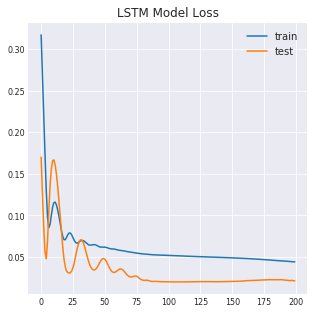

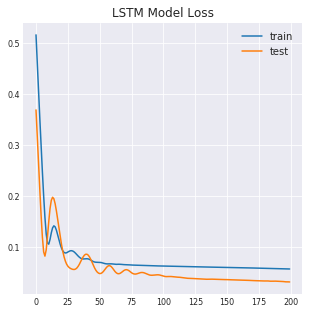

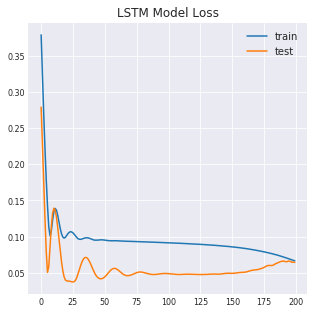

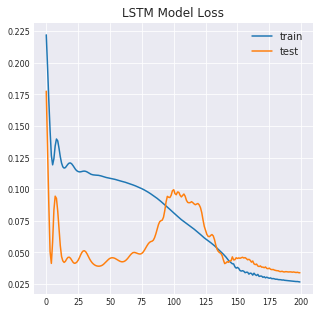

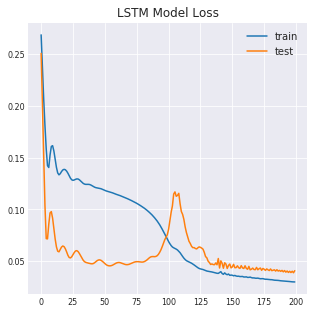

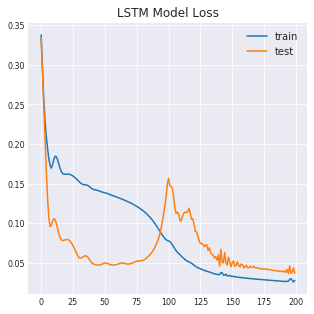

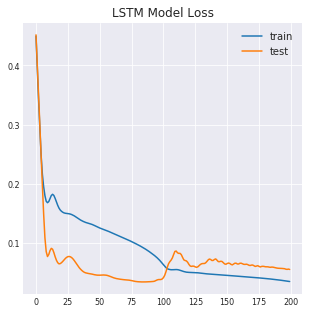

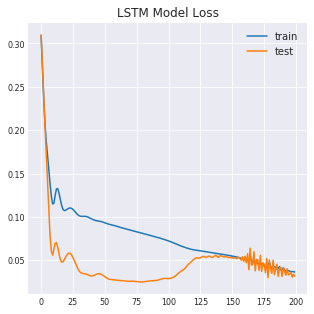

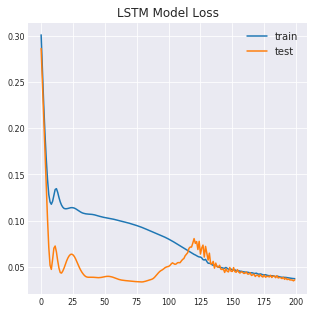

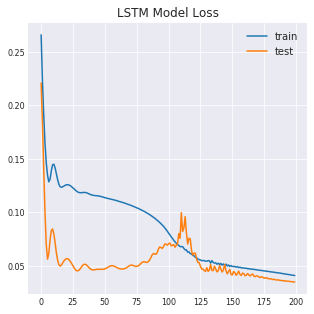

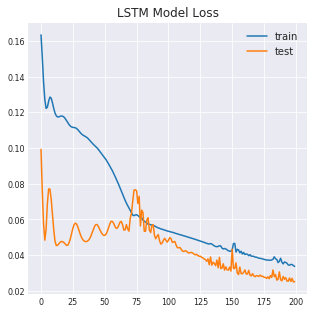

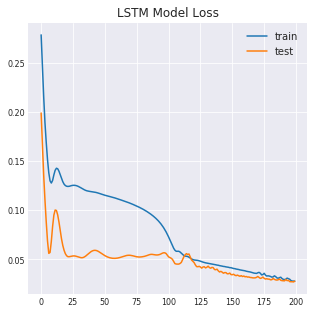

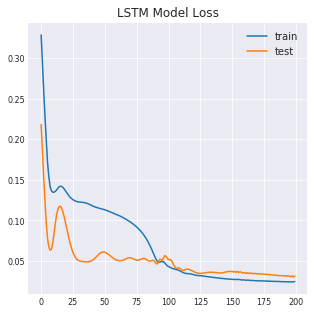

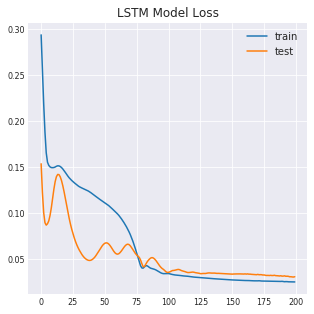

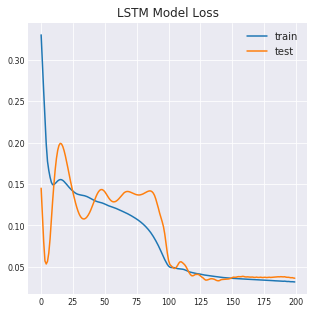

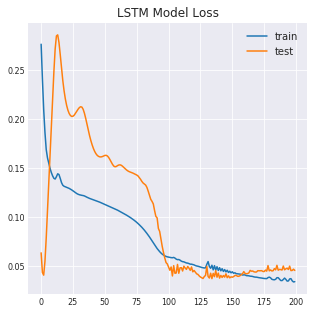

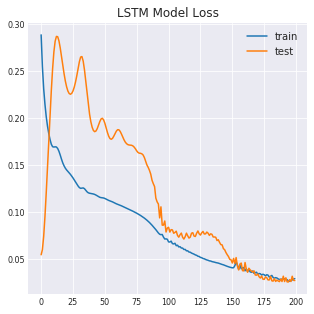

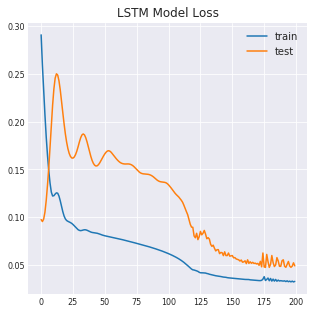

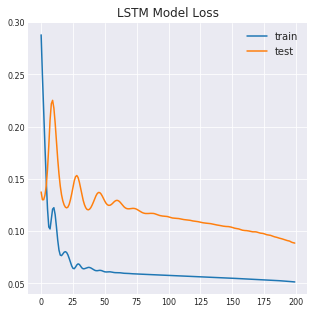

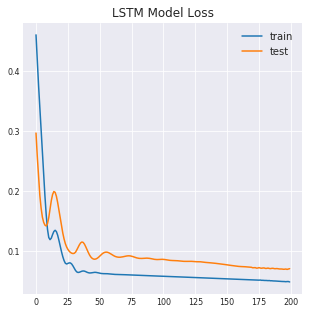

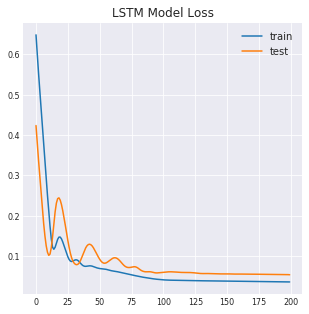

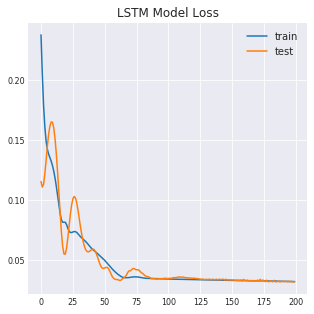

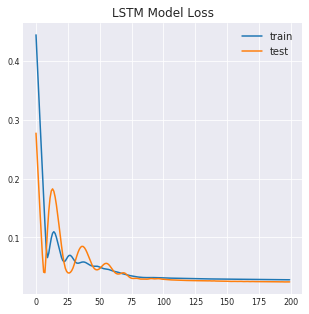

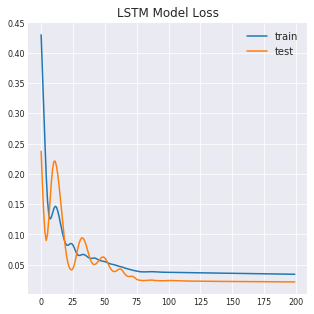

In [8]:
for i in range (24):
    values = total_values[total_values[:, -4] == total_values[i, 1]]
    n_train_hours = 365*3
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(48, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # fit network
    history = model.fit(train_X, train_y, epochs=200, batch_size=train_X.shape[0],
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
    
    history_loss = pd.DataFrame()
    history_loss['train'] = history.history['loss']
    history_loss['test'] = history.history['val_loss']
    history_loss.plot(figsize=(5,5), fontsize=8,
                title='LSTM Model Loss');
    
    # make a prediction 
    yhat = model.predict(test_X)
    # reshape back to 2d
    test_X = test_X.reshape((test_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat = np.concatenate((test[:, 115:119], yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test[:, 115:119], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    inv_yhat_gte_zero = inv_yhat.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    # calculate r2
    result[0, i] = r2_score(inv_y, inv_yhat)

    # calculate mean absolute error
    result[1, i] = mean_absolute_error(inv_y, inv_yhat)

    # calculate rmse
    rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
    result[2, i]= rmse

    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y - inv_yhat)/inv_y))*100
    result[3, i] = maep
    
    #train bias
    yhat_t = model.predict(train_X)
    # reshape back to 2d
    train_X = train_X.reshape((train_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat_t = np.concatenate((train[:, 115:119], yhat_t), axis=1)
    inv_yhat_t = scaler.inverse_transform(inv_yhat_t)
    inv_yhat_t = inv_yhat_t[:,-1]

    # invert scaling for actual
    train_y = train_y.reshape((len(train_y), 1))
    inv_y_t = np.concatenate((train[:, 115:119], train_y), axis=1)
    inv_y_t = scaler.inverse_transform(inv_y_t)
    inv_y_t = inv_y_t[:,-1]
    inv_yhat_gte_zero = inv_yhat_t.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    index = (np.abs((inv_y_t - inv_yhat_t)/inv_y_t) < 1)
    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y_t[index] - inv_yhat_t[index])/inv_y_t[index]))*100
    
    result[4, i] = maep

In [9]:
result

array([[ 6.23981770e-01,  2.78641296e-01, -2.71240073e+00,
         4.44958837e-03,  3.45401944e-01,  4.23969936e-01,
        -1.47370114e-01,  4.85989085e-01,  4.53468028e-01,
         6.40416942e-01,  8.64877360e-01,  8.70184803e-01,
         7.84451654e-01,  7.63816760e-01,  5.17990539e-01,
        -2.98055840e-01,  3.41420000e-01,  5.29238081e-01,
         9.44167983e-02,  3.00474080e-01,  1.28564494e-01,
         3.51971569e-01,  5.02089012e-01,  6.21412882e-01],
       [ 1.19152808e+03,  1.73170471e+03,  3.60316650e+03,
         1.90430310e+03,  2.29571484e+03,  2.07091992e+03,
         3.09296167e+03,  1.77268323e+03,  2.03390833e+03,
         1.94695874e+03,  1.41407410e+03,  1.56169751e+03,
         1.75996545e+03,  1.73190002e+03,  2.03178027e+03,
         2.55532959e+03,  1.52249304e+03,  2.75241187e+03,
         4.97666016e+03,  3.91432129e+03,  2.99546289e+03,
         1.78323315e+03,  1.36322729e+03,  1.21167725e+03],
       [ 1.57873921e+03,  2.13925723e+03,  4.11298918e